# Galatic Titanic Notebook

In [39]:
import pandas as pd
import tensorflow as tf
import keras

In [40]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

So I start by just reading in all the data. I want to make sure I have the correct CSV's and dataframes. 

I will work toward turning in a final csv to this 

# Data Preprocessing

In [360]:
test = pd.read_csv('data/test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [361]:
train = pd.read_csv('data/train.csv')
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [362]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Ok so now the data looks at least usable to do data exploration and find null values etc. I can tell from this data that I will probably need to one-hot-encode the string values if I want to use them as well as convert the boolen to binary data. Lets go in and check our distributions!

# Data Exploration

What I want to do in this section is check general distributions long with see where there may be null values I need to interpolate or places feature engineering might be useful

In [363]:
null_counts = train.isnull().sum()
null_counts

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

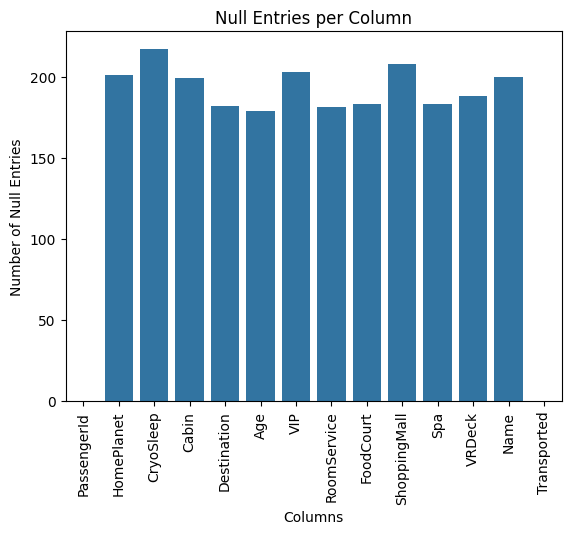

In [364]:
sns.barplot(x=null_counts.index, y=null_counts.values)
plt.xticks(rotation=90) 
plt.xlabel('Columns')
plt.ylabel('Number of Null Entries')
plt.title('Null Entries per Column')
plt.show()

I can tell that there are many missing values. This is good to see that at least every data point has a label for transported and has its primary key (passengerID). We can deal with the missing values later.

In [365]:
numerical_columns = train.select_dtypes(include=[int, float])

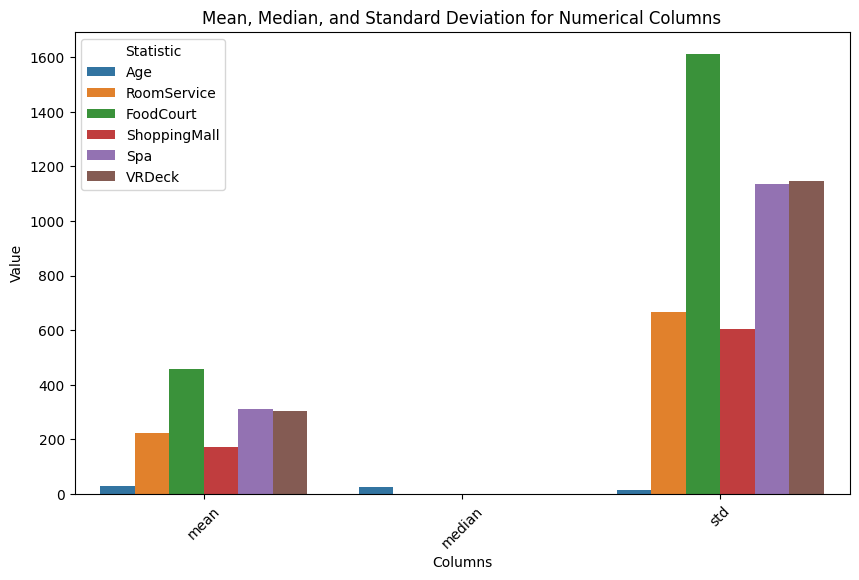

In [366]:
statistics = numerical_columns.agg(['mean', 'median', 'std'])
statistics = statistics.reset_index()

statistics = statistics.melt(id_vars='index', var_name='Statistic', value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='Value', hue='Statistic', data=statistics)
plt.xlabel('Columns')
plt.ylabel('Value')
plt.title('Mean, Median, and Standard Deviation for Numerical Columns')
plt.xticks(rotation=45)

plt.show()

Maybe not critically important but it is interesting to see that the stdevation of data, especially foodcourt, is high. We will need to do normalization moving forward.

UNIQUE VALUE ANLYSIS


MY goal in this seciton is to see the cardinality of the string based rows. If there is low cardinality this will allow me to use one-hot-encoding for it but if there is a high number of unique values then I may need to do some 

In [367]:
def createGraphs(data, column):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    count_labels = data[column].value_counts()

    plt.pie(count_labels, labels=count_labels.index, autopct='%.1f%%', shadow=True)
    plt.subplot(1, 2, 2)

    sns.countplot(data=data, x=column, palette='pastel', hue='Transported')
    plt.title(f'Bar Graph of {column} Counts')
    plt.tight_layout()
    plt.show()

In [368]:
cols = ['HomePlanet', 'Destination','CryoSleep', 'VIP']

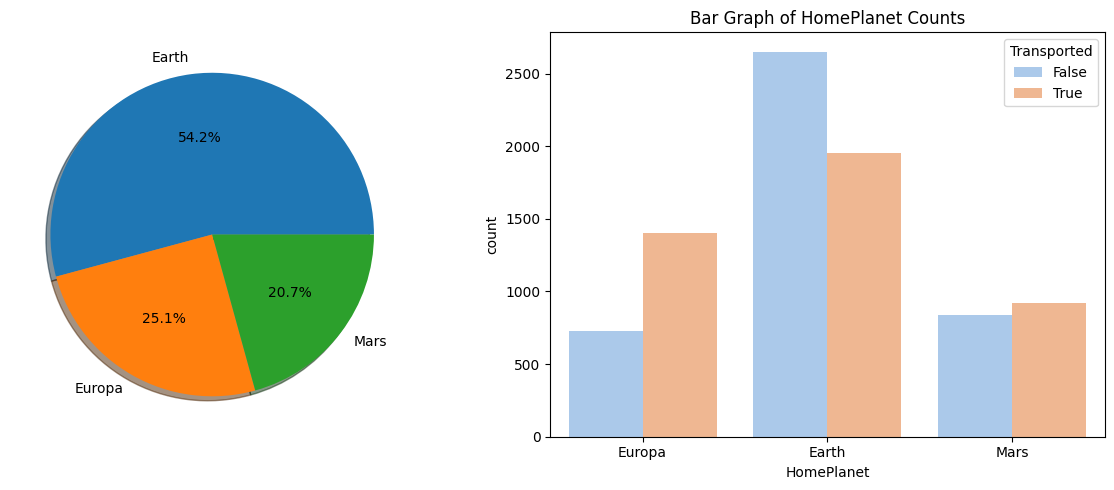

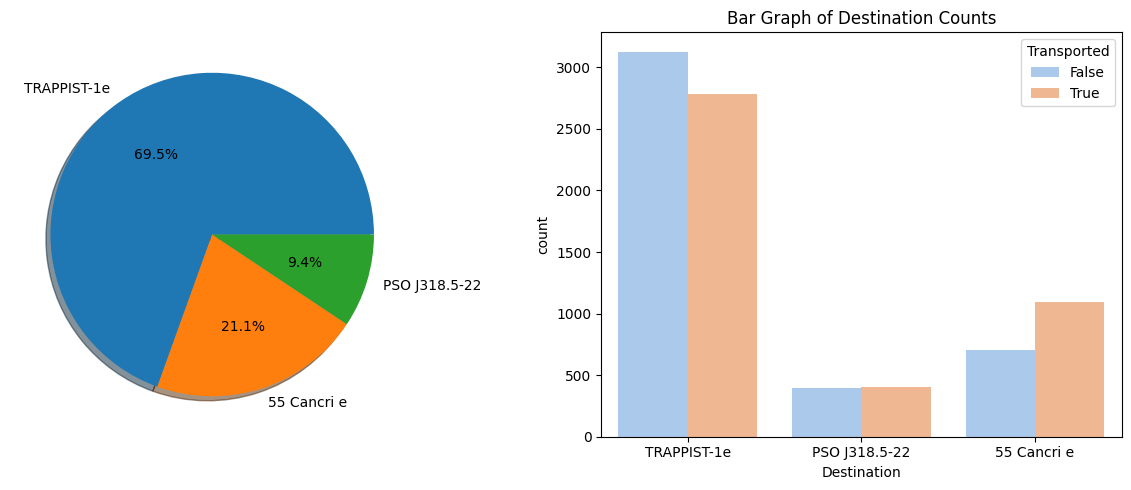

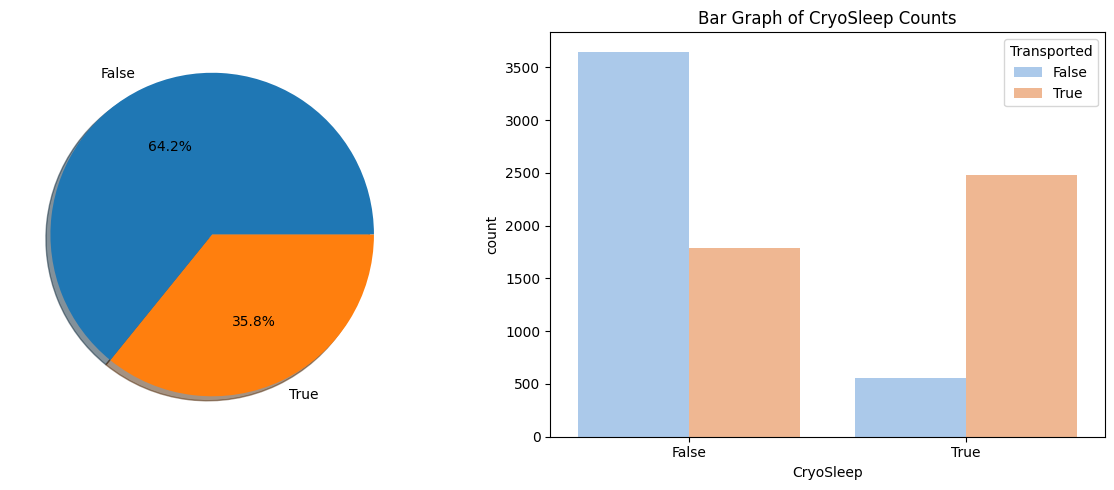

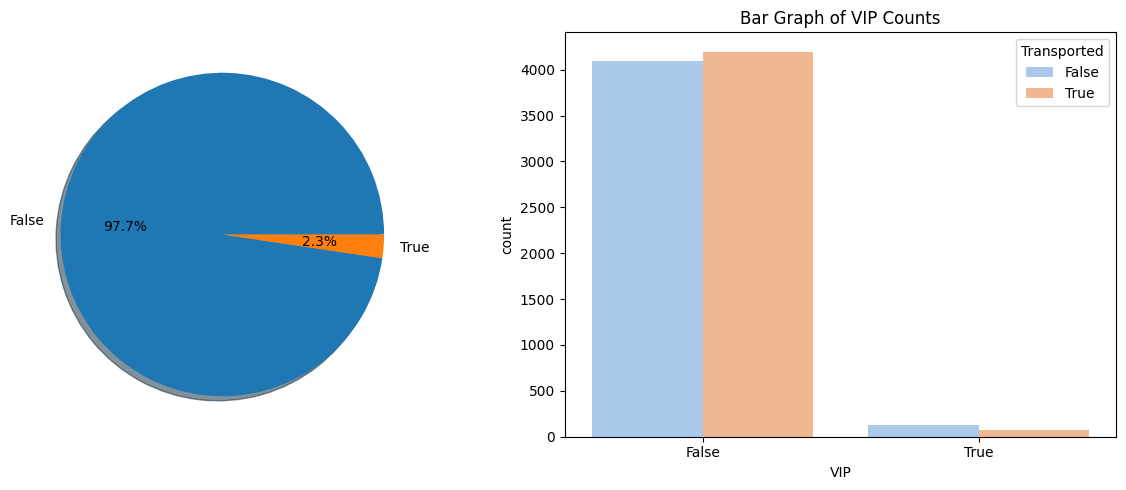

In [369]:
for column in cols :
    createGraphs(train, column)

My takeaways from graphs like this are a few things:

1. Its good to see that the features that ares strings only have a few unique values. That means I can use one hot encoding instead of having to do PCA reduction to process the data for an algorithm
2. I notice here at the end VIP is full of almost entirely false flags. I may consider not using this feature or doing something else with it because there seems to not really be enough varying information here to be worth training on.

In [370]:
def BarGraphs(data, column):
    sns.histplot(data=data, x=column)

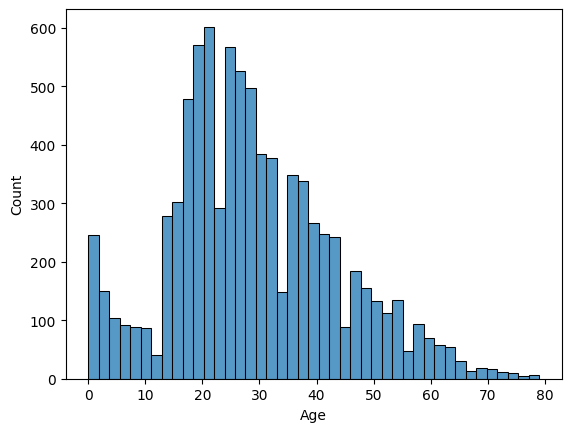

In [371]:
BarGraphs(train, 'Age')

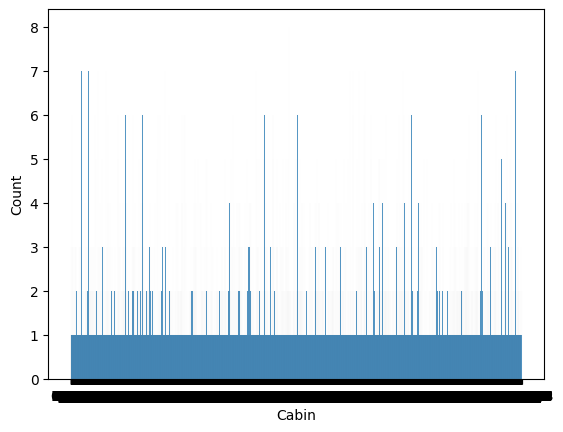

In [372]:
BarGraphs(train, 'Cabin')

Alot of cabins!! 

# Data Processing and Preparation

The objective of this section is to do the feature engineering and data preparation to give our models good usable data that it can read. 

I want to use a few of the things I have learned in the EDA section as actions.

The first thing I will do is split up the cabin. I see that the cabin is a string but I think I can treat this more as Level, Room, Type of room so I will break it into three columns. This will give us more features and help us treat the symptom of having too many cabins. One other option would be to do PCA dimensionality reduction to compress the data and help clustering or other methods.

The second thing I would like to do is to create age bins that may make it easier to classify types of ages instead of treating each age indivudally. I know age is a continuous variable but we can look at that data as not 'exact' in the sense that old is relative but 1 year doesnt change a lot. 

The third thing I will do is change the True/False to binary data so that it is a little more prepared.

The fourth thing I will do is create a 'total spent' feature. I see that roomservice, shoppingmll, spa, and vrdeck look like money spent so I can try and correlate the cost expendatures. This could be an interesting insight!

When looking at the null values I notice that for 'cost' related data I can actually just fill the training data with 0 if it is one of the original cost associated columns. So for example if theres no money spent on roomservice Ill assume that its 0. There are also some null values in age, VIP, and Cryosleep. For cryosleep and VIP those are more objective so I will assume that if the data is missing they neither declined nor signed up for the option and will set the category to false. However in the case of 'AGE' this is more on a scale and I will set the null value to -1 and create a bin where the data can be seen as  null value.

In [374]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [375]:
train = pd.read_csv('data/train.csv')

In [376]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [377]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler

def process_data(data):
    #split the cabin into rooms and floors etc. I think the data works this way but it would be nice to know more about the native data!
    data['Cabin'].fillna('Z/9999/Z', inplace=True)
    
    data['Cabin_deck'] = data['Cabin'].apply(lambda x: x.split('/')[0])
    data['Cabin_number'] = data['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
    data['Cabin_side'] = data['Cabin'].apply(lambda x: x.split('/')[2])

    data.drop(['Cabin'], axis=1, inplace=True)

    #For null age values I will say they are -1. I now want bin them.
    data['Age'].fillna(-1, inplace=True)
    age_bins = [-1, 0, 12, 19, 35, 60, float('inf')]
    age_labels = [-1, 0, 1, 2, 3, 4,]
    #Age bins
    data['Age_Groups'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False, include_lowest=True)
    data['Age_Groups'] = data['Age_Groups'].cat.codes.astype(int)
    #For cost data, set values to 0 because they didnt spend any recorded money!!
    cost_col = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    data[cost_col] = data[cost_col].fillna(0)

    #Total spend column. Avg the nulls
    data['Total Spend'] = data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
    data['Total Spend'].fillna(data['Total Spend'].mean(), inplace=True)

    #one hot encode my data
    label_encoder = LabelEncoder()

    # Fit and transform the 'names' column
    data['Name'] = label_encoder.fit_transform(data['Name'])
    data['PassengerId'] = label_encoder.fit_transform(data['PassengerId'])
    



    categorical_data = data[['HomePlanet', 'Cabin_deck' ,'Cabin_side', 'Destination']]


    encoder = OneHotEncoder()
    encoded_categorical_data = encoder.fit_transform(categorical_data).toarray()
    encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=encoder.get_feature_names_out(categorical_data.columns))
    columns_to_keep = [col for col in encoded_categorical_df.columns if not col.endswith('_nan')]
    encoded_categorical_df = encoded_categorical_df[columns_to_keep]


    data.drop(['HomePlanet', 'Cabin_deck' ,'Cabin_side', 'Destination'], axis= 1, inplace= True)

    processed_data = pd.concat([data, encoded_categorical_df], axis=1)

    #finally the binary columns to 0 or 1

    

    binary_cols = ['CryoSleep', 'VIP']

    if 'Transported' in data.columns:
        binary_cols.append('Transported')

    def lambda_callback(x):
        if x == True:
            return 1
        else:
            return 0

    for col in binary_cols:
        processed_data[col] = processed_data[col].apply(lambda_callback)


    #Fill cryosleep and vip with 0. Transported has no null values so doesnt matter:
    processed_data[binary_cols] = processed_data[binary_cols].fillna(0)


    return processed_data


    

In [378]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [379]:
train = process_data(train)

In [380]:
transposed_df = train.T
transposed_df

,0,1,2,3,4,5,6,7,8,9,...,8683,8684,8685,8686,8687,8688,8689,8690,8691,8692
PassengerId,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,8683.0,8684.0,8685.0,8686.0,8687.0,8688.0,8689.0,8690.0,8691.0,8692.0
CryoSleep,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Age,39.0,24.0,58.0,33.0,16.0,44.0,26.0,28.0,35.0,14.0,...,21.0,23.0,0.0,32.0,30.0,41.0,18.0,26.0,32.0,44.0
VIP,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
RoomService,0.0,109.0,43.0,0.0,303.0,0.0,42.0,0.0,0.0,0.0,...,86.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,126.0
FoodCourt,0.0,9.0,3576.0,1283.0,70.0,483.0,1539.0,0.0,785.0,0.0,...,3.0,0.0,0.0,1146.0,3208.0,6819.0,0.0,0.0,1049.0,4688.0
ShoppingMall,0.0,25.0,0.0,371.0,151.0,0.0,3.0,0.0,17.0,0.0,...,149.0,0.0,0.0,0.0,0.0,0.0,0.0,1872.0,0.0,0.0
Spa,0.0,549.0,6715.0,3329.0,565.0,291.0,0.0,0.0,216.0,0.0,...,208.0,0.0,0.0,50.0,2.0,1643.0,0.0,1.0,353.0,0.0
VRDeck,0.0,44.0,49.0,193.0,2.0,0.0,0.0,0.0,0.0,0.0,...,329.0,0.0,0.0,34.0,330.0,74.0,0.0,0.0,3235.0,12.0
Name,5252.0,4502.0,457.0,7149.0,8319.0,6878.0,1155.0,1453.0,556.0,2864.0,...,3453.0,1702.0,6309.0,2318.0,841.0,3524.0,4780.0,3002.0,1596.0,6380.0


Now the data looks gooooood!

# Data Models and Evaluation

In this section I plan to create 3 different models and evaluate the performnce of all three.

In [381]:

targets = train['Transported']
inputs = train.drop(['Transported'], axis=1)
inputs

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_deck_Z,Cabin_side_P,Cabin_side_S,Cabin_side_Z,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,5252,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,4502,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,457,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,7149,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,8319,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,8688,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,3524,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8689,8689,1,18.0,0,0.0,0.0,0.0,0.0,0.0,4780,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8690,8690,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,3002,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8691,8691,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,1596,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [382]:
inputs.isna().sum().sum()

0

The first model I will employ is the logistic regression model from sklearn. I think this is a good option to start. My task is really a binary classification algorithm so starting with a regular logistic regression makes sense.

In [383]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [391]:

x_train, x_test, y_train, y_test = train_test_split(inputs,targets,test_size=.15, random_state=39)

In [392]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer


scaler = Normalizer()

# Fit the scaler to your training data (including numerical, one-hot encoded, and labeled columns)

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)


In [393]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train_scaled, y_train)

log_pred = logistic_model.predict(x_test_scaled)

In [394]:
from sklearn.metrics import confusion_matrix

In [395]:
cm = confusion_matrix(y_test, log_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[419 219]
 [ 78 588]]


In [396]:
precision = precision_score(y_test, log_pred)
recall = recall_score(y_test, log_pred)
f1 = f1_score(y_test, log_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.7286245353159851
Recall: 0.8828828828828829
F1-Score: 0.7983706720977597


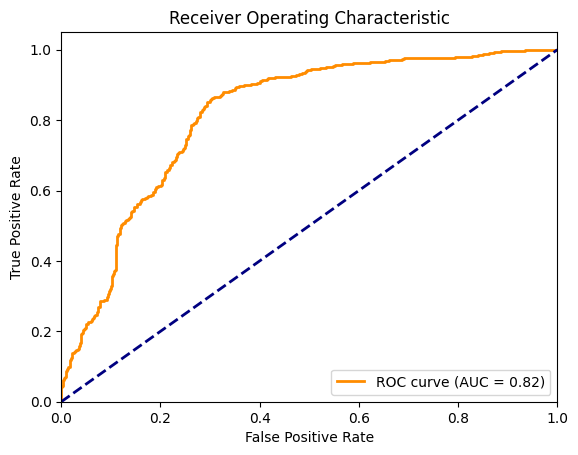

In [397]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

probas = logistic_model.predict_proba(x_test_scaled)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, probas)
auc = roc_auc_score(y_test, probas)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

So as we can see from above the model classifies the data pretty well. Its precision isnt amazing but its recall is better. Im ok with thsi because recall should be used when the consequence for a false negative is worse than the consequence for a false postive. Recall is TP/TP+FN and precision is TP/TP +FP. So in this case we want to know if someone was transported to another dimension so a false negative (meaning we said they were not but they indeed were lost) seems more problematic because we wont be looking for them. I would prioritize the false negatives over false postiives.

One other observation I had was that the model got perfect scores when using max_min scaler but got more reasonable scores using the normalized scaler. This means to me that the there may be outliers in the data that get scaled better on an indivudal column basis than as a whole batch.

Next is XGBoost Ensable classifier

In [398]:
import xgboost as xgb
from xgboost import XGBClassifier

In [399]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)
xgb_model.fit(x_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [400]:
xg_pred = xgb_model.predict(x_test)

In [401]:
accuracy = accuracy_score(y_test, xg_pred)
precision = precision_score(y_test, xg_pred)
recall = recall_score(y_test, xg_pred)
f1 = f1_score(y_test, xg_pred)
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(x_test_scaled)[:, 1])

In [402]:
print(accuracy)
print(precision)
print(recall)
print(f1)
print(roc_auc)

0.7285276073619632
0.7524271844660194
0.6981981981981982
0.7242990654205607
0.8950714036920934


In [403]:
cm = confusion_matrix(y_test, xg_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[485 153]
 [201 465]]


Looking at these stats the xgboost ensemble method performs slightly better in both recall and f1 score but has slightly lower precision. This stands with my interpretation of the problem before. I kind of expected this result initially because I would assume the ensemble method can handle outliers better than the single logistic regression. The ROC score is much higher as well meaning that it can definately distinguish between the two classes well. One thing I also like about this model is that there were NO false negatives, this is powerful because at least I know the algorithm would rather say that someone was transported and tell people to look for them before saying they were safe incorrectly. Having this characterstic does make the xgboost algorithm more desireable IMO.

OK Now I will try a simple nueral network using tensorflow and keras to predict a binary outcome. Hopefully we will be able to tune this a little more than the pre-packaged ones.


In [404]:
import tensorflow as tf
from tensorflow import keras

In [450]:

model = keras.Sequential([

    keras.layers.Input(shape=(x_train_scaled.shape[1],)),
    
    keras.layers.Dense(8, activation='relu'),
    
    keras.layers.Dense(16, activation='relu'),
    
    # Output layer with sigmoid activation for binary classification
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',])

# Train the model
model.fit(x_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4751 - loss: 0.6976 - val_accuracy: 0.5345 - val_loss: 0.6917
Epoch 2/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5685 - loss: 0.6871 - val_accuracy: 0.6299 - val_loss: 0.6623
Epoch 3/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6538 - loss: 0.6506 - val_accuracy: 0.7206 - val_loss: 0.5915
Epoch 4/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7138 - loss: 0.5906 - val_accuracy: 0.7585 - val_loss: 0.5427
Epoch 5/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7416 - loss: 0.5477 - val_accuracy: 0.7571 - val_loss: 0.5228
Epoch 6/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7589 - loss: 0.5347 - val_accuracy: 0.7801 - val_loss: 0.5117
Epoch 7/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7671 - loss: 0.5354 - val_accuracy: 0.7801 - val_loss: 0.5062
Epoch 8/20
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7628 - loss: 0.5235 - val_accuracy: 0.

In [451]:
# Evaluate the model on the validation or test data
loss, accuracy = model.evaluate(x_test_scaled, y_test)

# Make predictions
nn1_pred = model.predict(x_test_scaled)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7792 - loss: 0.4991
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [452]:
additional_metrics = {
    'Accuracy': accuracy_score(y_test, (nn1_pred > 0.5).astype(int)),
    'Precision': precision_score(y_test, (nn1_pred > 0.5).astype(int)),
    'Recall': recall_score(y_test, (nn1_pred > 0.5).astype(int)),
    'F1-Score': f1_score(y_test, (nn1_pred > 0.5).astype(int)),
    'ROC AUC': roc_auc_score(y_test, nn1_pred),
}


In [453]:
for metric, value in additional_metrics.items():
    print(f'{metric}: {value}')

Accuracy: 0.7875766871165644
Precision: 0.7465145754119138
Recall: 0.8843843843843844
F1-Score: 0.8096219931271477
ROC AUC: 0.8355973528387322


So above I demonstrate creating a very basic nueral network using tensorflow. I see similar results to previous algorithms up in the .7's and .8's for recall and precision. What is interesting is the precision on this model is much higher than the other algorithms before it. Where the accuracy is about the same. The recall is lower, but not significantly. This algorithm may be useful in cases where we want to focus on preventing false positives, such tht we do not claim the positive but in fact it is not true. Our use case is the opposite, we dont mind saying someone is missing from the fire (or in this case the galatic entanglment) but in fact they are present; we just dont want to say that the person is OK but have them really be in danger. It is interesting that this algorithm has such a low accuracy with those scores, it makes me consider trying to improve that. 

Next Up I want to try an additional NN with another layer, and dropout, using the unscaled values. I think that more trainable parameters will increase the learning, dropout to decrease overfitting as seen from the unscaled data, and perhaps using a min/max scaler.

*After playing around with the model a bit I noticed that keeping the normalizer seems to be the best decision for the scaler... I must have missed some outliers in the data.

In [409]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer


scaler2 = Normalizer()

# Fit the scaler to your training data (including numerical, one-hot encoded, and labeled columns)

x_train_scaled2 = scaler2.fit_transform(x_train)

x_test_scaled2 = scaler2.transform(x_test)

In [414]:
model2 = keras.Sequential([
    keras.layers.Input(shape=(x_train_scaled2.shape[1],)),
    

    keras.layers.Dense(64, activation='relu'),
    
    # Adding a dropout layer to prevent overfitting
    #keras.layers.Dropout(.2)
    
    keras.layers.Dense(128, activation='relu'),
    
    keras.layers.Dense(64, activation='relu'),
    
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model2.fit(x_train_scaled2, y_train, epochs=30, batch_size=8, validation_split=0.2)

Epoch 1/30
739/739 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6946 - loss: 0.5842 - val_accuracy: 0.7930 - val_loss: 0.4760
Epoch 2/30
739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7649 - loss: 0.5068 - val_accuracy: 0.7977 - val_loss: 0.4595
Epoch 3/30
739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7813 - loss: 0.4943 - val_accuracy: 0.8004 - val_loss: 0.4562
Epoch 4/30
739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7829 - loss: 0.4901 - val_accuracy: 0.7977 - val_loss: 0.4655
Epoch 5/30
739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7903 - loss: 0.4839 - val_accuracy: 0.7970 - val_loss: 0.4589
Epoch 6/30
739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7782 - loss: 0.4844 - val_accuracy: 0.8011 - val_loss: 0.4532
Epoch 7/30
739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7807 - loss: 0.4859 - val_accuracy: 0.7991 - val_loss: 0.4527
Epoch 8/30
739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7772 - loss: 0.4932 - val_accuracy: 0.

In [415]:
# Evaluate the model on the validation or test data
loss, accuracy = model2.evaluate(x_test_scaled2, y_test)

# Make predictions
nn2_pred = model2.predict(x_test_scaled2)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7934 - loss: 0.4703
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [416]:
additional_metrics = {
    'Accuracy': accuracy_score(y_test, (nn2_pred > 0.5).astype(int)),
    'Precision': precision_score(y_test, (nn2_pred > 0.5).astype(int)),
    'Recall': recall_score(y_test, (nn2_pred > 0.5).astype(int)),
    'F1-Score': f1_score(y_test, (nn2_pred > 0.5).astype(int)),
    'ROC AUC': roc_auc_score(y_test, nn2_pred),
}


In [417]:
for metric, value in additional_metrics.items():
    print(f'{metric}: {value}')

Accuracy: 0.7967791411042945
Precision: 0.764163372859025
Recall: 0.8708708708708709
F1-Score: 0.8140350877192983
ROC AUC: 0.8599155581914203


Here are model 1's values:

Accuracy: 0.7875766871165644

Precision: 0.7465145754119138

Recall: 0.8843843843843844

F1-Score: 0.8096219931271477

ROC AUC: 0.8355973528387322

We can see that these models are very similar in what they have. Model 2 has higher precision but slightly lower recall. 

Overall I will not continue with the nueral networks because after testing them on the test data they seemed to overfit to the training data too much. I most likely need to reduce paramters and add regularization and dropout to my algorithms. With more time I would look into this.

I will use the XGBOOST ensemble algorithm as it performed the best with the least overfitting. 


# Final Dataframe and submission testing:



In [454]:
final_df = process_data(test)
final_df

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,Cabin_deck_F,Cabin_deck_G,Cabin_deck_T,Cabin_deck_Z,Cabin_side_P,Cabin_side_S,Cabin_side_Z,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,1,27.0,0,0.0,0.0,0.0,0.0,0.0,2912,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0,2406,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,1,31.0,0,0.0,0.0,0.0,0.0,0.0,3376,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,3,0,38.0,0,0.0,6652.0,0.0,181.0,585.0,2711,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4,0,20.0,0,10.0,0.0,635.0,0.0,0.0,668,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,4272,1,34.0,0,0.0,0.0,0.0,0.0,0.0,2105,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4273,4273,0,42.0,0,0.0,847.0,17.0,10.0,144.0,2654,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4274,4274,1,-1.0,0,0.0,0.0,0.0,0.0,0.0,2085,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4275,4275,0,-1.0,0,0.0,2680.0,0.0,0.0,523.0,2327,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [457]:
final_scaled = scaler2.transform(final_df)

# Make predictions
final_pred = xgb_model.predict(final_scaled)


In [462]:
final_pred = (final_pred==1) #set to True/False
print(final_pred)

[ True False  True ...  True  True  True]


In [463]:
test = pd.read_csv('data/test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [464]:
submission_df = pd.DataFrame(columns=['PassengerId'])
submission_df['PassengerId'] = test['PassengerId']
submission_df['Transported'] = final_pred

In [465]:
submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [466]:
submission_df.to_csv('prediction.csv' , index=False)

[![Image Alt Text](comp.png)]

 .78 score! This is ok and places me near the top 1000 for this competition!